Problem 1

a.)

Image 1 Shape: (250, 350, 3)
Image 1 Channels: 3

Image 2 Shape: (980, 1633, 3)
Image 2 Channels: 3


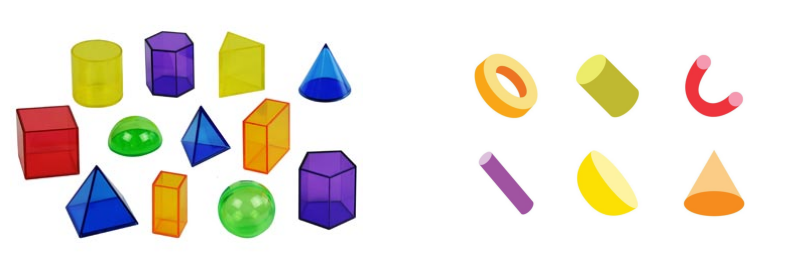

In [210]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage

img1 = cv2.imread('img/GeoShapes1.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('img/GeoShapes2.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)



fig = plt.figure(figsize=(10, 10)) 

fig.add_subplot(2, 2, 1) 
plt.axis('off')
plt.imshow(img1)
print("Image 1 Shape: " + str(img1.shape))
print("Image 1 Channels: " + str(img1.ndim) + "\n")

fig.add_subplot(2, 2, 2) 
plt.axis('off')
plt.imshow(img2)
print("Image 2 Shape: " + str(img2.shape))
print("Image 2 Channels: " + str(img2.ndim))


b.)

(-0.5, 1632.5, 979.5, -0.5)

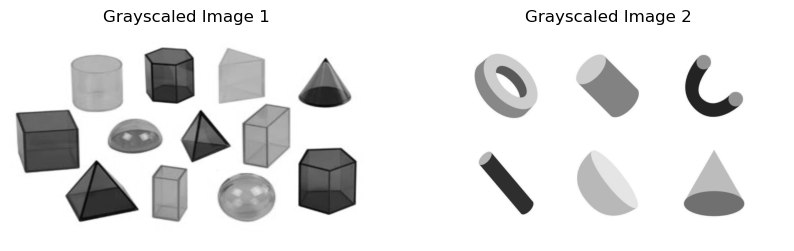

In [211]:
img1 = cv2.resize(img1, (img2.shape[1], img2.shape[0]))
gray_image1 = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
gray_image2 = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

fig = plt.figure(figsize=(10, 10)) 

fig.add_subplot(2, 2, 1) 
plt.imshow(gray_image1, cmap = 'gray')
plt.title("Grayscaled Image 1")
plt.axis('off')

fig.add_subplot(2, 2, 2) 
plt.imshow(gray_image2, cmap = 'gray')
plt.title("Grayscaled Image 2")
plt.axis('off')




Grayscale simplifies the algorithm and reduces computational requirements and changing the images to the same sizes makes sure the images will be manipulated in the same way and can be processed by specific programs that may want certain dimensions.

c.)

i.)

(-0.5, 1632.5, 979.5, -0.5)

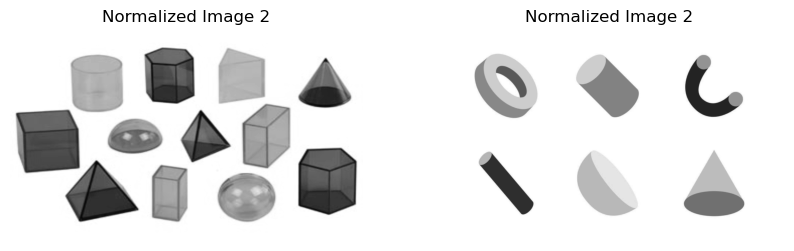

In [212]:
img1 = (gray_image1 - np.min(gray_image1)) / (np.max(gray_image1) - np.min(gray_image1))
img2 = (gray_image2 - np.min(gray_image2)) / (np.max(gray_image2) - np.min(gray_image2))

fig = plt.figure(figsize=(10, 10)) 

fig.add_subplot(2, 2, 1) 
plt.imshow(img1, cmap= 'gray')
plt.title("Normalized Image 2")
plt.axis('off')

fig.add_subplot(2, 2, 2) 
plt.imshow(img2, cmap= 'gray')
plt.title("Normalized Image 2")
plt.axis('off')


ii.)

202.60597
2.2944344e-06

242.66911
1.9492929e-05


(-0.5, 1632.5, 979.5, -0.5)

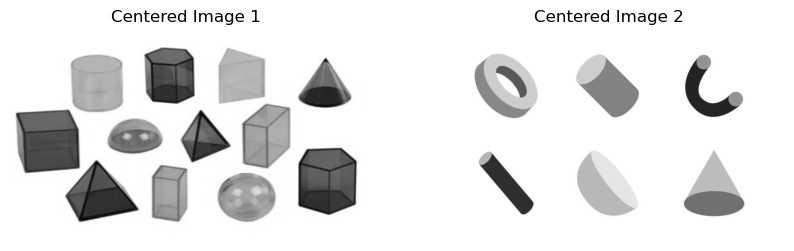

In [213]:
fig = plt.figure(figsize=(10, 10)) 

data1 = np.asarray(gray_image1)
data1 = data1.astype('float32')
mean = data1.mean()
print(mean)
data1 = data1 - mean
print(data1.mean())
print()

fig.add_subplot(2, 2, 1)
plt.imshow(data1, cmap = 'gray')
plt.title("Centered Image 1")
plt.axis('off')


data2 = np.asarray(gray_image2)
data2 = data2.astype('float32')
mean = data2.mean()
print(mean)
data2 = data2 - mean
print(data2.mean())

fig.add_subplot(2, 2, 2) 
plt.imshow(data2, cmap = 'gray')
plt.title("Centered Image 2")
plt.axis('off')

iii.)

(-0.5, 1632.5, 979.5, -0.5)

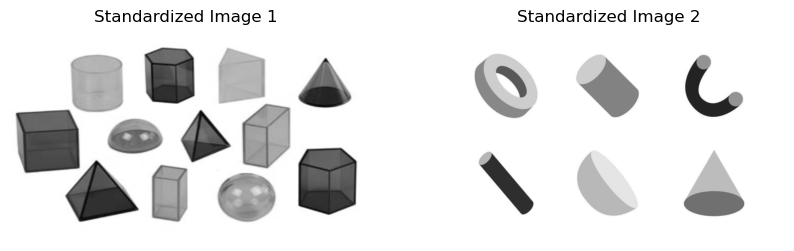

In [214]:
fig = plt.figure(figsize=(10, 10)) 

mean = np.mean(gray_image1)
std = np.std(gray_image1)
standardized1 = (gray_image1 - mean) / std

fig.add_subplot(2, 2, 1) 
plt.imshow(standardized1, cmap = 'gray')
plt.title("Standardized Image 1")
plt.axis('off')

mean = np.mean(gray_image2)
std = np.std(gray_image2)
standardized2 = (gray_image2 - mean) / std


fig.add_subplot(2, 2, 2) 
plt.imshow(standardized2, cmap = 'gray')
plt.title("Standardized Image 2")
plt.axis('off')

Machine learning models need to work with uniform data, so standardization makes sure all the images in a particular data set are the same format. Standardization condenses the data entries to have a mean of 0 and a standard deviation of 1, reflecting the Gaussian or Normal Distribution which is easy to work with. If we did not standardize a dataset, then it would take much longer to train and would not help much in terms of accuracy.

Problem 2

a.)

(-0.5, 1632.5, 979.5, -0.5)

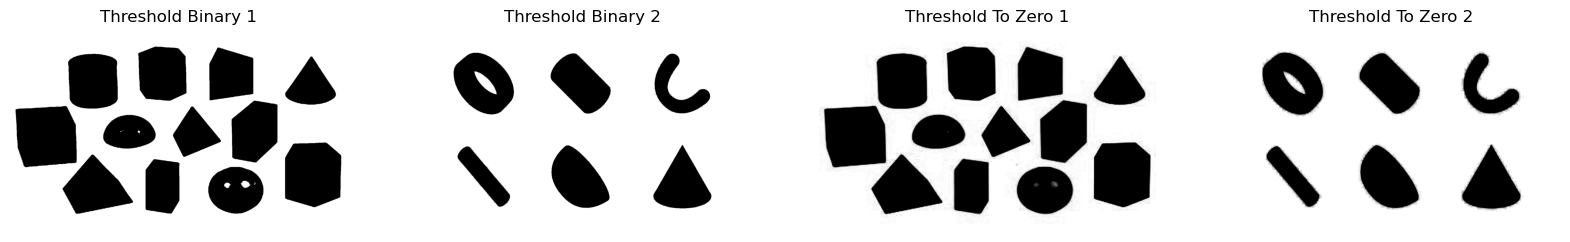

In [215]:
fig = plt.figure(figsize=(20, 20)) 

ret,thresh1 = cv2.threshold(standardized1,0,1,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(standardized2,0,1,cv2.THRESH_BINARY)
ret,thresh3 = cv2.threshold(standardized1,0,1,cv2.THRESH_TOZERO)
ret,thresh4 = cv2.threshold(standardized2,0,1,cv2.THRESH_TOZERO)
 
fig.add_subplot(2, 4, 1) 
plt.imshow(thresh1, cmap = 'gray')
plt.title("Threshold Binary 1")
plt.axis('off')

fig.add_subplot(2, 4, 2) 
plt.imshow(thresh2, cmap = 'gray')
plt.title("Threshold Binary 2")
plt.axis('off')

fig.add_subplot(2, 4, 3) 
plt.imshow(thresh3, cmap = 'gray')
plt.title("Threshold To Zero 1")
plt.axis('off')


fig.add_subplot(2, 4, 4) 
plt.imshow(thresh4, cmap = 'gray')
plt.title("Threshold To Zero 2")
plt.axis('off')


b.)

(-0.5, 1632.5, 979.5, -0.5)

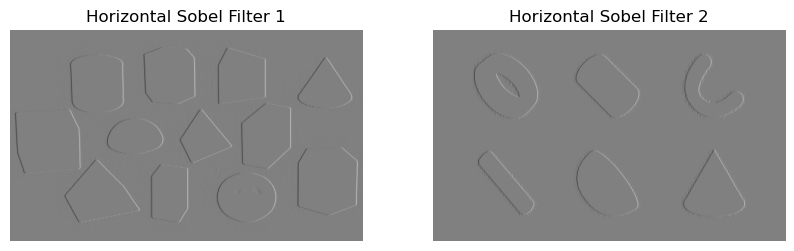

In [216]:
fig = plt.figure(figsize=(10, 10)) 

fig.add_subplot(2, 2, 1) 
sobelx = cv2.Sobel(thresh3,cv2.CV_64F,1,0) 
plt.imshow(sobelx, cmap = 'gray') 
plt.title("Horizontal Sobel Filter 1")
plt.axis('off')


fig.add_subplot(2, 2, 2) 
sobelx = cv2.Sobel(thresh4,cv2.CV_64F,1,0) 
plt.imshow(sobelx, cmap = 'gray') 
plt.title("Horizontal Sobel Filter 2")
plt.axis('off')